In [23]:
import pandas as pd
df=pd.read_csv('csv_데이터의완결성.csv',index_col=0)
df.head()

,abv,ibu,id,name,style,brewery_id,ounces
0,0.050,NaN,1436,Pub Beer,American Pale Lager,408,12.0
1,0.066,NaN,2265,Devil's Cup,American Pale Ale (APA),177,12.0
2,0.071,NaN,2264,Rise of the Phoenix,American IPA,177,12.0
3,0.075,NaN,2262,Sex and Candy,American IPA,177,12.0
4,0.077,NaN,2261,Black Exodus,Oatmeal Stout,177,12.0


<Axes: >

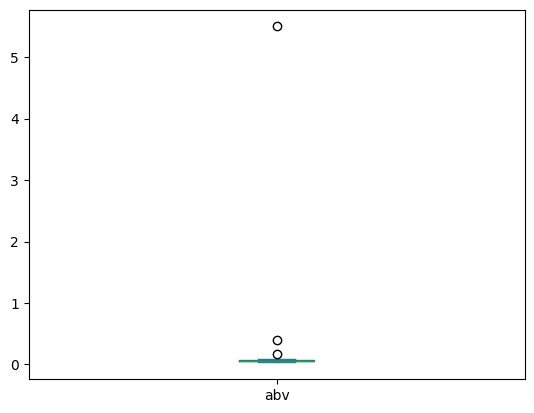

In [24]:
df.plot(kind='box',y='abv')

In [25]:
df['abv'].describe()


count    2190.000000
mean        0.060186
std         0.117010
min         0.032000
25%         0.050000
50%         0.055000
75%         0.065000
max         5.500000
Name: abv, dtype: float64

In [36]:
Q1=df['abv'].quantile(0.25)
Q1

0.05

In [37]:
Q3=df['abv'].quantile(0.75)
Q3

0.065

In [39]:
IQR=Q3-Q1

# 25%지점의 1.5 지점 아래 있거나
re=(df['abv']<Q1-1.5*IQR)| (df['abv']>Q3+1.5*IQR)
df[re]

,abv,ibu,id,name,style,brewery_id,ounces
963,0.172,NaN,3691,Chamisul Fresh,Soju,993,12.17
1856,0.400,NaN,3012,Grey Goose,Vodka,893,25.26
2250,5.500,40.0,145,Silverback Pale Ale,American Pale Ale (APA),424,12.00


In [40]:
df.loc[2250,'abv']=0.055
df.loc[2250]

abv                             0.055
ibu                              40.0
id                                145
name              Silverback Pale Ale
style         American Pale Ale (APA)
brewery_id                        424
ounces                           12.0
Name: 2250, dtype: object

In [11]:
df.loc[2250,'abv']=0.055
df.loc[2250]

abv                             0.055
ibu                              40.0
id                                145
name              Silverback Pale Ale
style         American Pale Ale (APA)
brewery_id                        424
ounces                           12.0
Name: 2250, dtype: object

In [41]:
re=(df['abv']<Q1-1.5*IQR)| (df['abv']>Q3+1.5*IQR)
df[re]

,abv,ibu,id,name,style,brewery_id,ounces
963,0.172,NaN,3691,Chamisul Fresh,Soju,993,12.17
1856,0.400,NaN,3012,Grey Goose,Vodka,893,25.26


In [42]:
df[re].index

Index([963, 1856], dtype='int64')

In [43]:
df.drop(df[re].index,inplace=True)

In [44]:
re=(df['abv']<Q1-1.5*IQR)| (df['abv']>Q3+1.5*IQR)
df[re]

,abv,ibu,id,name,style,brewery_id,ounces
